# <center><b>Vehicle Insurance Prediction<b></center>

---
<a name = Section1></a>
# **1. Problem Statement**
---
An insurance company that offers health insurance wants to cross-sell vehicle insurance to its existing customers.

Goal is to build a predictive model that can identify whether a current health insurance customer is likely to be interested in purchasing vehicle insurance.

---
<a name = Section2></a>
# **2. Installing & Importing Libraries**
---

In [124]:
import pandas as pd                                                 # Importing for panel data analysis
import numpy as np                                                  # For numerical python operations
import seaborn as sns                                               # Importin seaborm library for interactive visualization
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import joblib                                                       # To Save & Load the model
from scipy.stats import pearsonr                                    # Importing pearson test to check correlation
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import accuracy_score                          # For calculating the accuracy for the model
from sklearn.metrics import precision_score                         # For calculating the Precision of the model
from sklearn.metrics import recall_score                            # For calculating the recall of the model
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import confusion_matrix                        # For verifying model performance using confusion matrix
from sklearn.metrics import f1_score                                # For Checking the F1-Score of our model
from sklearn.metrics import roc_curve                               # For Roc-Auc metric estimation
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error # To evaluate the Performance
from sklearn.metrics import classification_report                   # To generate classification report
from imblearn.over_sampling import SMOTE                            # To address the imbalance class
from imblearn.combine import SMOTEENN, SMOTETomek                   # To handle advanced Resampling technique
import xgboost as xgb                                               # To create the XG Boost model
from sklearn.model_selection import RandomizedSearchCV              # To find the best parameter by searching random combinations of param from a predefined grid
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part
from sklearn.linear_model import LogisticRegression                 # To create the Logistic Regression Model
from sklearn.preprocessing import StandardScaler                    # Importing to scale the features
from sklearn.neighbors import KNeighborsClassifier                  # To instantiate a KNN Classifier
from sklearn.model_selection import GridSearchCV                    # To tune the models
from sklearn.ensemble import RandomForestClassifier                 # To perform modeling using RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay                   # To plot confusion matrix
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings('ignore')                                   # Warnings will appear only once

---
<a name = Section3></a>
# **3. Data Acquisition**
---

In [2]:
## Read the Insurance dataset ##
url = "https://gitlab.com/accredian/insaid-data/-/raw/main/PGP%20Job%20G%20Session%20Repo/2024/insurance_dataset.csv?ref_type=heads"
df_insurance = pd.read_csv(url)

---
<a name = Section4></a>
# **4. Data Description**
---

- In this section we will get **information about the data** and see some observations.

In [3]:
df_insurance.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
# Get the Information about the Insurance Dataset
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


**Observation:**

- There are **no null values present** in this data set.

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 381109  | 12 | 34.9+ MB|

</br>

|Id|Features|Description|
| :-- | :-- | :-- |
|01|**id**|Unique ID for the customer|
|02|**Gender**|Gender of the customer |
|03|**Age**|Age of the customer |
|04|**Driving_License**|0 : Customer does not have DL, 1 : Customer already has DL |
|05|**Region_Code**|Unique code for the region of the customer |
|06|**Previously_Insured**|1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance |
|07|**Vehicle_Age**|Age of the Vehicle |
|08|**Vehicle_Damage**|1 Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past. |
|09|**Annual_Premium**|The amount customer needs to pay as premium in the year |
|10|**Policy_Sales_Channel**|Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc. |
|11|**Vintage**|Number of Days, Customer has been associated with the company |
|12|**Response**|1 : Customer is interested, 0 : Customer is not interested |

<br>

In [4]:
# Retrieve few records to get the glimise of data:
df_insurance.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


<a name = Section5></a>

---
# **5. Examine the Data**
- In this section we will **analyse about the Insurance data**.
---

<a name = Section511></a>
#### **5.1 Check the Duplicate records in Insurance Data**

In [ ]:
print(f'Duplicate Records in Insurance Data : {df_insurance.duplicated().sum()}')

Duplicate Records in Insurance Data : 0


<a name = Section512></a>
#### **5.2 Check the Missing Values in Insurance Data**

In [ ]:
ins_cols = df_insurance.columns.tolist()
print(f"Missing Values in Insurance Data:")
for cols in ins_cols:
    print(f"{cols:20s} : {df_insurance[cols].isnull().sum()}")

Missing Values in Insurance Data:
id                   : 0
Gender               : 0
Age                  : 0
Driving_License      : 0
Region_Code          : 0
Previously_Insured   : 0
Vehicle_Age          : 0
Vehicle_Damage       : 0
Annual_Premium       : 0
Policy_Sales_Channel : 0
Vintage              : 0
Response             : 0


<a name = Section513></a>
#### **5.3 Check the Invalid Values in Insurance Data**

In [ ]:
all_cols = df_insurance.columns.to_list()
for cols in all_cols:
  print(f"{cols}")
  print(f"{df_insurance[cols].value_counts()}")
  print("-------------------------------")

id
id
381109    1
1         1
2         1
3         1
4         1
         ..
10        1
9         1
8         1
7         1
6         1
Name: count, Length: 381109, dtype: int64
-------------------------------
Gender
Gender
Male      206089
Female    175020
Name: count, dtype: int64
-------------------------------
Age
Age
24    25960
23    24256
22    20964
25    20636
21    16457
      ...  
81       56
82       29
83       22
84       11
85       11
Name: count, Length: 66, dtype: int64
-------------------------------
Driving_License
Driving_License
1    380297
0       812
Name: count, dtype: int64
-------------------------------
Region_Code
Region_Code
28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
36.0      8797
33.0      7654
47.0      7436
35.0      6942
6.0       6280
45.0      5605
37.0      5501
18.0      5153
48.0      4681
14.0      4678
39.0      4644
10.0      4374
21.0

In [ ]:
# Check the Region Code values
df_insurance['Region_Code'].sort_values().unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52.])

In [ ]:
# Check the number of records when Region_Code is 0.0
print(f"Number of Records when Region_Code is 0.0 = {len(df_insurance[df_insurance['Region_Code'] == 0.0])}")

Number of Records when Region_Code is 0.0 = 2021


---
<a name = Section6></a>
# **6. Challenges in Dataset**
---

- **Region_Code** with **0** having **2021** records.
- **Vehicle_Age** column have three categories such as **1-2 Year, < 1 Year, > 2 Years**, which needs to convert to **One Hot encoding**:
- Following **Categorical** columns need to be convert to **Label encoding**:
   - **Gender** column have **Male, Female** values.
   - **Vehicle_Damage** have **Yes, No** values.
- **No Duplicate records** observed.
- **No missing records** found.
- **Data Imbalance** observed in **Driving_License** 1 (380297 records), 0 (812 records).

---
<a name = Section7></a>
# **7. Resolve the Challenges**
---

- In this section we will see **how to resolve the challenges in Insurance data**.

<a name = Section71></a>
### **7.1 Replace 0 with Mode value**

In [5]:
# Zero value in the Region_Code Column is replaced with the Mode value.
column_mode = df_insurance['Region_Code'].mode()[0]
df_insurance['Region_Code'].replace({0: column_mode}, inplace=True)

<a name = Section71></a>
### **7.2 Label Encoding**

In [6]:
# Convert the Categorical Columns - "Gender", & "Vehicle_Damage" to Label Encoding
df_insurance['Gender'].replace({'Female':1,'Male':0},inplace=True)
df_insurance['Vehicle_Damage'].replace({'Yes':1,'No':0},inplace=True)

<a name = Section71></a>
### **7.3 One Hot Encoding**

In [7]:
# Convert the Categorical Columns - "Vehicle_Age" to One Hot Encoding
df_insurance = pd.get_dummies(data=df_insurance, columns=['Vehicle_Age'], dtype=int)
df_insurance.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,0,44,1,28.0,0,1,40454.0,26.0,217,1,0,0,1
1,2,0,76,1,3.0,0,0,33536.0,26.0,183,0,1,0,0
2,3,0,47,1,28.0,0,1,38294.0,26.0,27,1,0,0,1
3,4,0,21,1,11.0,1,0,28619.0,152.0,203,0,0,1,0
4,5,1,29,1,41.0,1,0,27496.0,152.0,39,0,0,1,0


In [8]:
# Rename the One Hard coded columns
df_insurance.rename(columns={'Vehicle_Age_< 1 Year': 'Vehicle_Age_lt_1_Year', 'Vehicle_Age_1-2 Year': 'Vehicle_Age_1_2_Year','Vehicle_Age_> 2 Years':'Vehicle_Age_gt_2_Years'}, inplace=True)

<a name = Section74></a>
### **7.4 Handling Outlier**

In [ ]:
# upper_value = df_insurance['Annual_Premium'].quantile(0.98)    # CAPPING VALUE
# lower_value = df_insurance['Annual_Premium'].quantile(0.02)    # FLOORING VALUE
# df_insurance['Annual_Premium'] = df_insurance['Annual_Premium'].clip(lower=lower_value, upper=upper_value)

In [59]:
# print(upper_value)
# print(lower_value)

65380.83999999997
2630.0


<a name = Section75></a>
### **7.5 Drop ID Column**

In [9]:
df_insurance = df_insurance.drop('id', axis=1)

In [10]:
df_insurance.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1_2_Year,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years
0,0,44,1,28.0,0,1,40454.0,26.0,217,1,0,0,1
1,0,76,1,3.0,0,0,33536.0,26.0,183,0,1,0,0
2,0,47,1,28.0,0,1,38294.0,26.0,27,1,0,0,1
3,0,21,1,11.0,1,0,28619.0,152.0,203,0,0,1,0
4,1,29,1,41.0,1,0,27496.0,152.0,39,0,0,1,0


---
<a name = Section8></a>
# **8. Exploratory Data Analysis**
---

<a name = Section81></a>
### **8.1 Check the Data Distribution in Target variable**

In [11]:
df_insurance['Response'].value_counts()

,count
Response,
0,334399
1,46710


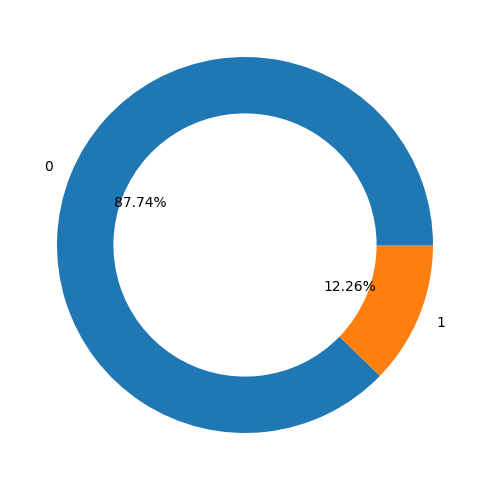

In [11]:
data_imbalance = df_insurance['Response'].value_counts(normalize=True)
fig, ax = plt.subplots(figsize=(5, 5))
data_imbalance.plot(kind='pie',
                ax=ax,
                subplots=True,
                autopct="%.2f%%",
                wedgeprops=dict(width=0.3))

plt.legend().remove()
plt.ylabel(None)
plt.tight_layout()

**Observation:**

- Above chart shows that **88%** of the customers are **Not Interested** to go for **Vehicle Insurance**, whereas **12%** of the customers are **Interested**
- **Data Imbalance** Observed in the Target variable - **Response**.

<a name = Section82></a>
### **8.2 Feature-wise Distribution Plots (EDA)**

<Axes: xlabel='Response', ylabel='Density'>

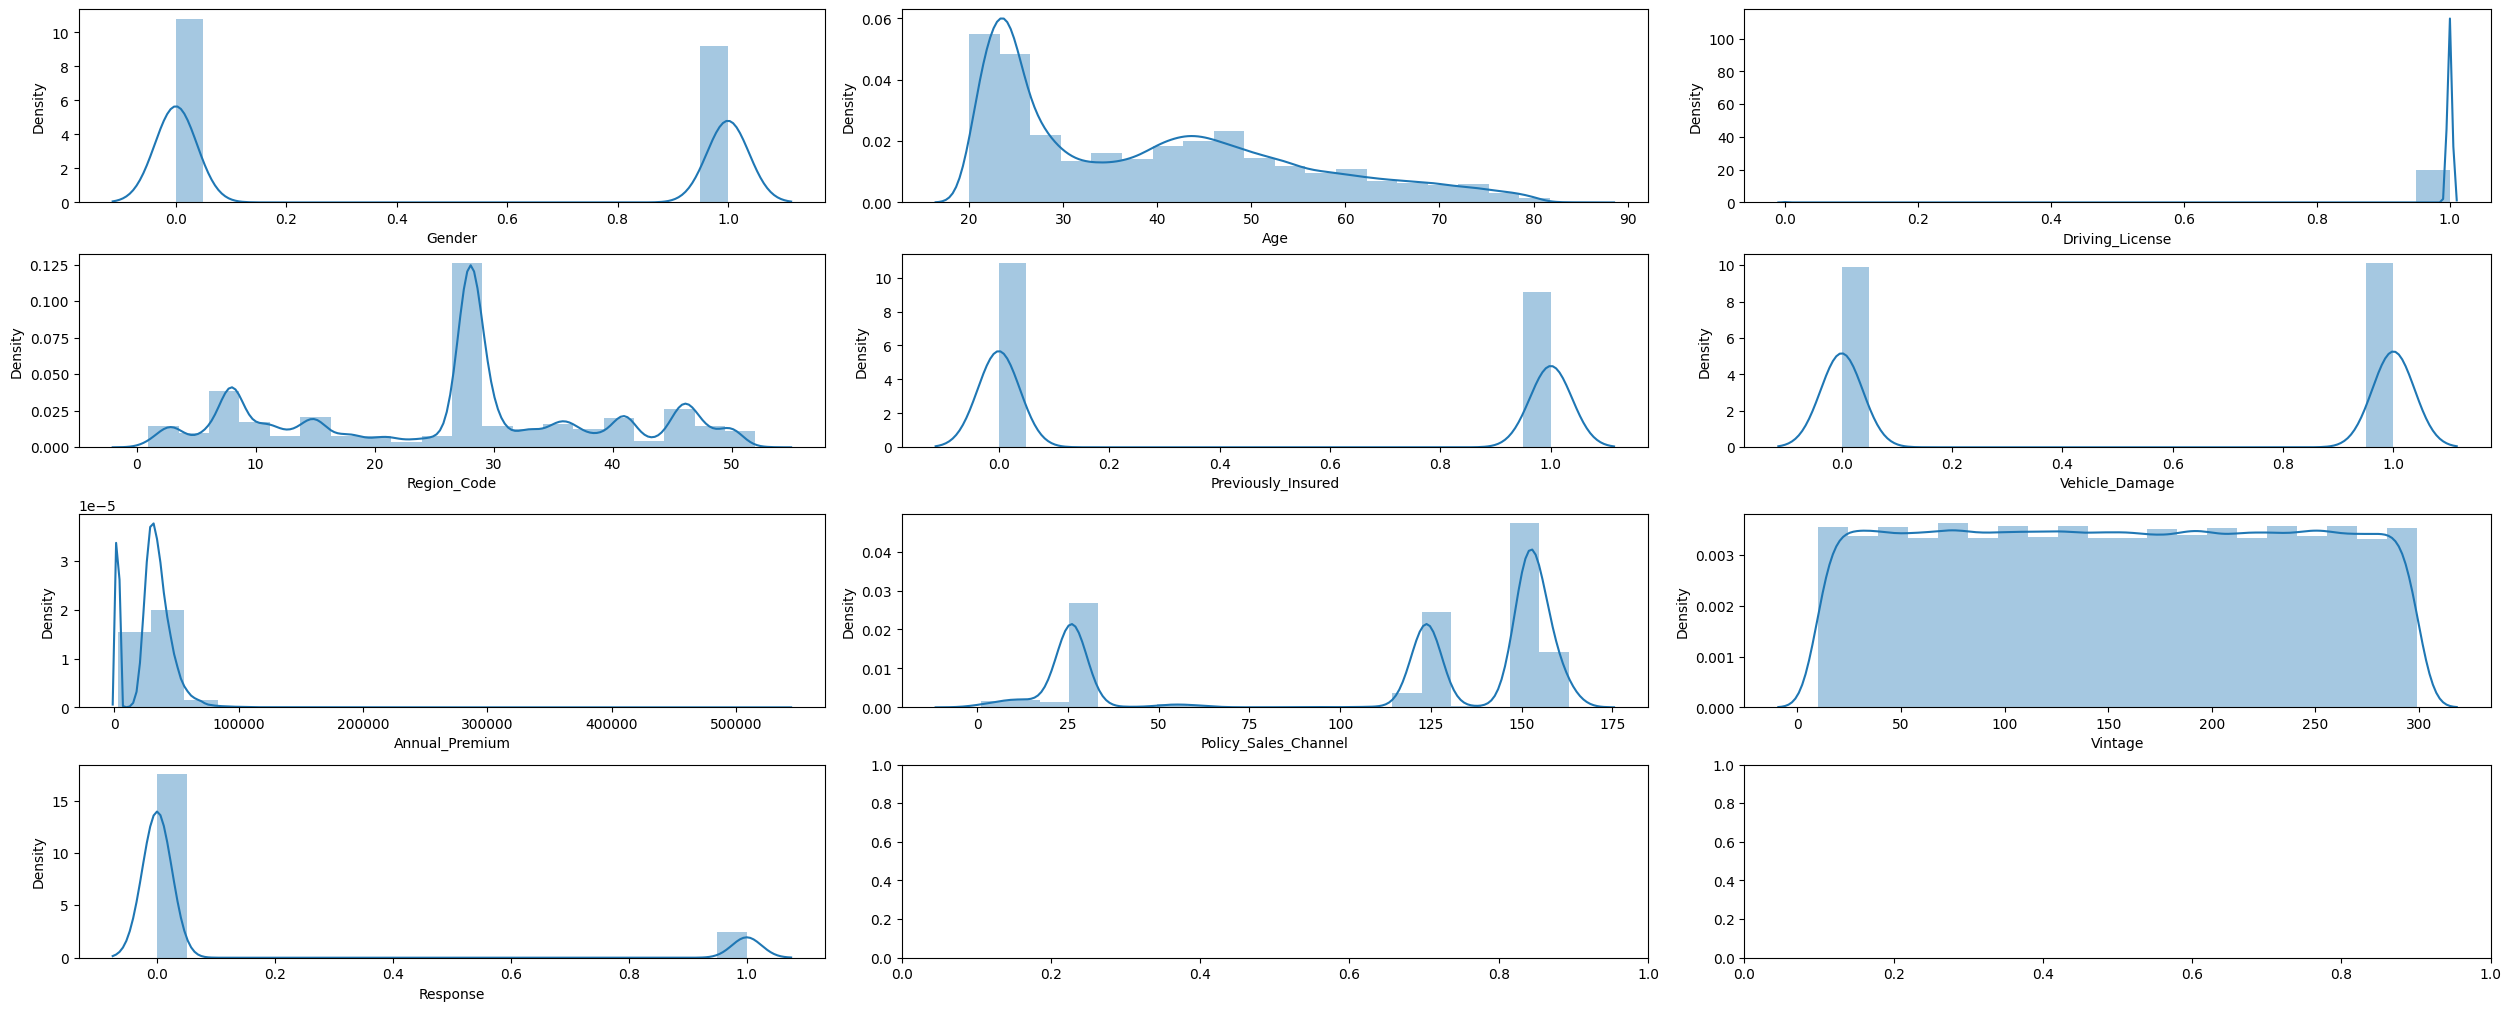

In [67]:
f,ax=plt.subplots(4,3,figsize=(25, 10),constrained_layout = True)
sns.distplot(df_insurance["Gender"],bins=20,ax=ax[0,0])
sns.distplot(df_insurance["Age"],bins=20,ax=ax[0,1])
sns.distplot(df_insurance["Driving_License"],bins=20,ax=ax[0,2])

sns.distplot(df_insurance["Region_Code"],bins=20,ax=ax[1,0])
sns.distplot(df_insurance["Previously_Insured"],bins=20,ax=ax[1,1])
sns.distplot(df_insurance["Vehicle_Damage"],bins=20,ax=ax[1,2])

sns.distplot(df_insurance["Annual_Premium"],bins=20,ax=ax[2,0])
sns.distplot(df_insurance["Policy_Sales_Channel"],bins=20,ax=ax[2,1])
sns.distplot(df_insurance["Vintage"],bins=20,ax=ax[2,2])

sns.distplot(df_insurance["Response"],bins=20,ax=ax[3,0])

**Observation:**

- Data distribution for **Driving_License** have severe **Imbalance data** ie (**Class "1" - 99% and Class "0" - 0.022%**). But, we will handle the data imbalance only on the Target variable.

<a name = Section83></a>
### **8.3 Individual Feature vs. Response**

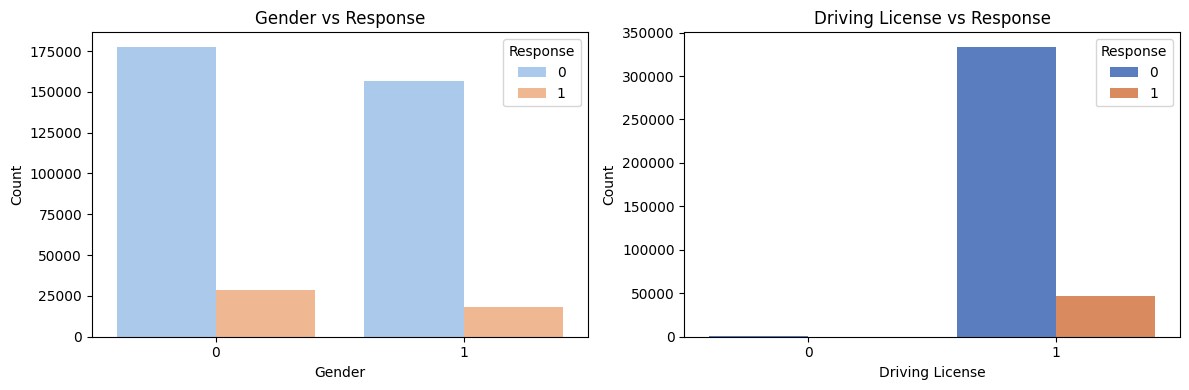

In [68]:
plt.figure(figsize=(12, 4))

# Gender vs Response
plt.subplot(1, 2, 1)
sns.countplot(x='Gender', hue='Response', data=df_insurance, palette='pastel')
plt.title('Gender vs Response')
plt.xlabel('Gender')
plt.ylabel('Count')

# Driving_License vs Response
plt.subplot(1, 2, 2)
sns.countplot(x='Driving_License', hue='Response', data=df_insurance, palette='muted')
plt.title('Driving License vs Response')
plt.xlabel('Driving License')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

### **Observation:**
**Gender**
- The number of female customers (Gender = 1) and male customers (Gender = 0) is fairly balanced. But for both genders, most people did not show Interest positively.
- Slightly more male are Interested (Response = 1) compared to Female, but the difference isn't dramatic.
- This suggests that gender may not be a very strong predictor of response behavior on its own.

**Driving License**
- Nearly everyone in the dataset has a driving license. Only a small fraction responded positively.
- Very few does not have Driving License.

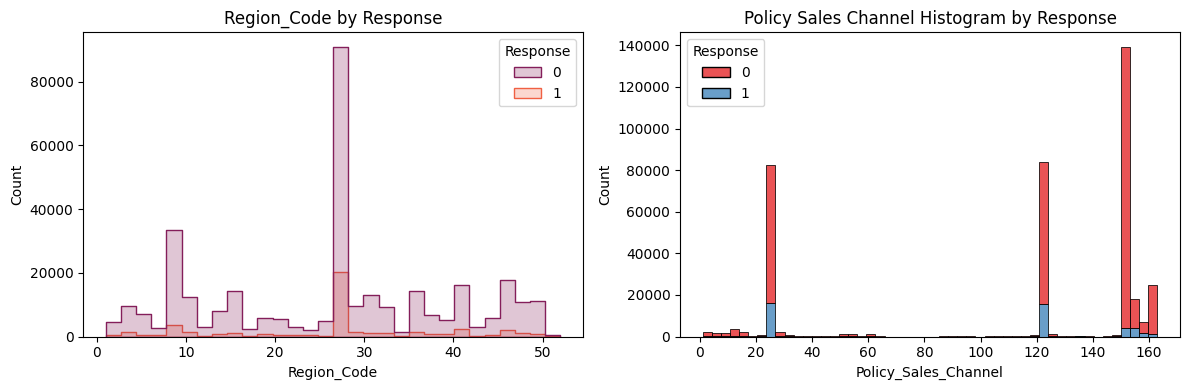

In [74]:
plt.figure(figsize=(12, 4))

# Region_Code by Response
plt.subplot(1, 2, 1)
sns.histplot(data=df_insurance, x='Region_Code', hue='Response', bins=30, kde=False, element='step', palette='rocket')
plt.title('Region_Code by Response')
plt.xlabel('Region_Code')
plt.ylabel('Count')

# Policy Sales Channel
plt.subplot(1, 2, 2)
sns.histplot(data=df_insurance, x='Policy_Sales_Channel', hue='Response',
             bins=50, multiple='stack', palette='Set1', kde=False)
plt.title('Policy Sales Channel Histogram by Response')
plt.xlabel('Policy_Sales_Channel')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

### **Observation:**
- **Region_Code** and **Policy_Sales_Channel** show **strong skew** — **few categories dominate**.
- Both features are potentially useful predictors of response.

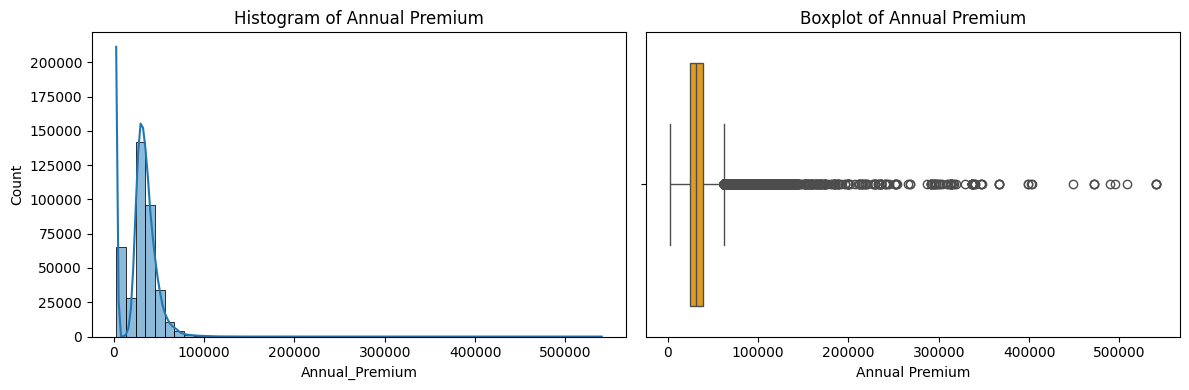

In [78]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(df_insurance['Annual_Premium'], bins=50, kde=True)
plt.title("Histogram of Annual Premium")
plt.xlabel('Annual_Premium')
plt.ylabel('Count')

# 2. Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df_insurance['Annual_Premium'], color='orange')
plt.title('Boxplot of Annual Premium')
plt.xlabel('Annual Premium')

plt.tight_layout()
plt.show()


### **Observation:**
Above plot shows the **strong right-skew** in the data. In domains like insurance, high premiums may genuinely reflect high-risk customers. Removing them might erase important business insights.

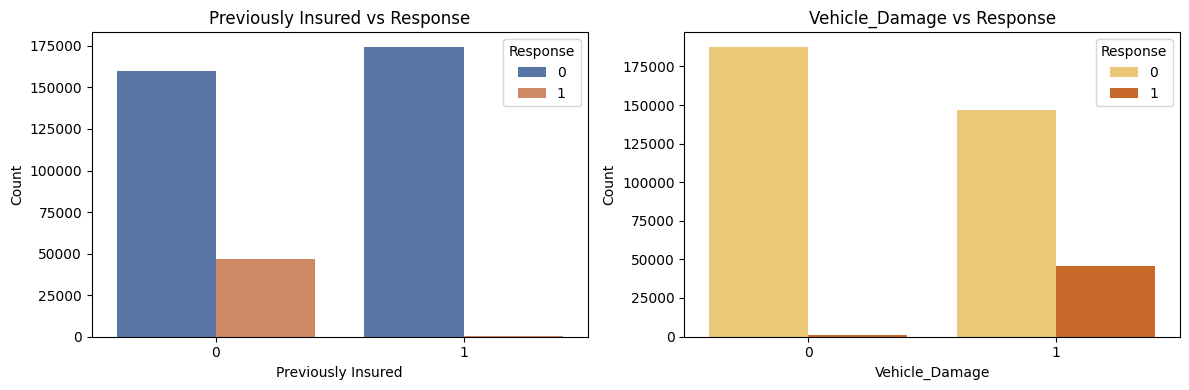

In [76]:
plt.figure(figsize=(12, 4))

# Previously_Insured vs Response
plt.subplot(1, 2, 1)
sns.countplot(x='Previously_Insured', hue='Response', data=df_insurance, palette='deep')
plt.title('Previously Insured vs Response')
plt.xlabel('Previously Insured')
plt.ylabel('Count')

# Vehicle_Damage vs Response
plt.subplot(1, 2, 2)
sns.countplot(x='Vehicle_Damage', hue='Response', data=df_insurance, palette='YlOrBr')
plt.title('Vehicle_Damage vs Response')
plt.xlabel('Vehicle_Damage')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

### **Observation:**
**Previously Insured**
- People not previously insured (0) show a much higher response rate compared to those who are already insured.
- In contrast, customers who are already insured (1) almost exclusively do not respond positively (nearly all blue bars).
- This strongly suggests that new insurance seekers are the primary responders.

**Vehicle Damage**
- Customers with damaged vehicles (1) are much more Interested in Insurance than those with undamaged vehicles.
- People with no damage have a very low response rate — mostly not interested.

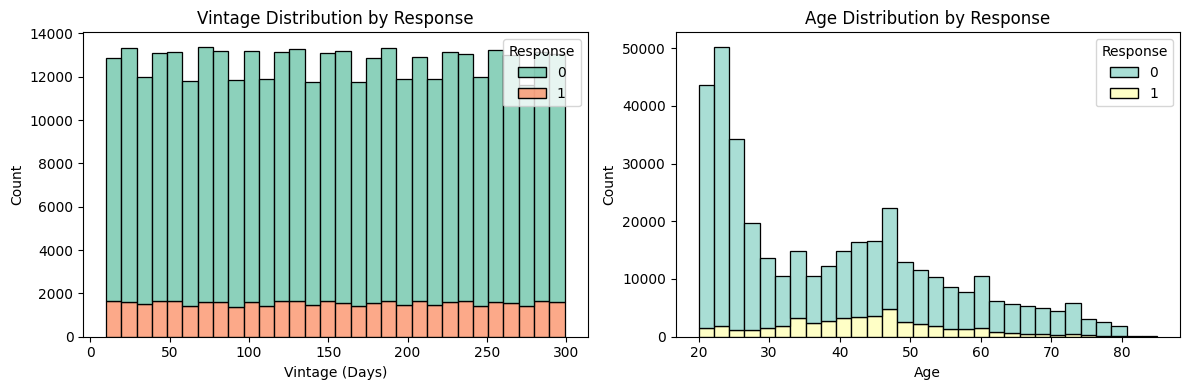

In [77]:
plt.figure(figsize=(12, 4))

# 1. Vintage vs Response
plt.subplot(1, 2, 1)
sns.histplot(data=df_insurance, x='Vintage', hue='Response',
             bins=30, kde=False, multiple='stack', palette='Set2')
plt.title('Vintage Distribution by Response')
plt.xlabel('Vintage (Days)')
plt.ylabel('Count')

# 2. Age vs Response
plt.subplot(1, 2, 2)
sns.histplot(data=df_insurance, x='Age', hue='Response',
             bins=30, kde=False, multiple='stack', palette='Set3')
plt.title('Age Distribution by Response')
plt.xlabel('Age')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


### **Observation:**
- Most customers are young (20–30 years), However, very few of them Interested (Response = 1). Most of them are not-Interested.
- While fewer people are in the 40–50 age range, a higher proportion of them are shown Interest in the product.

<a name = Section83></a>
### **8.3 Correlation between Features**

Text(0.5, 1.0, 'Correlation between features')

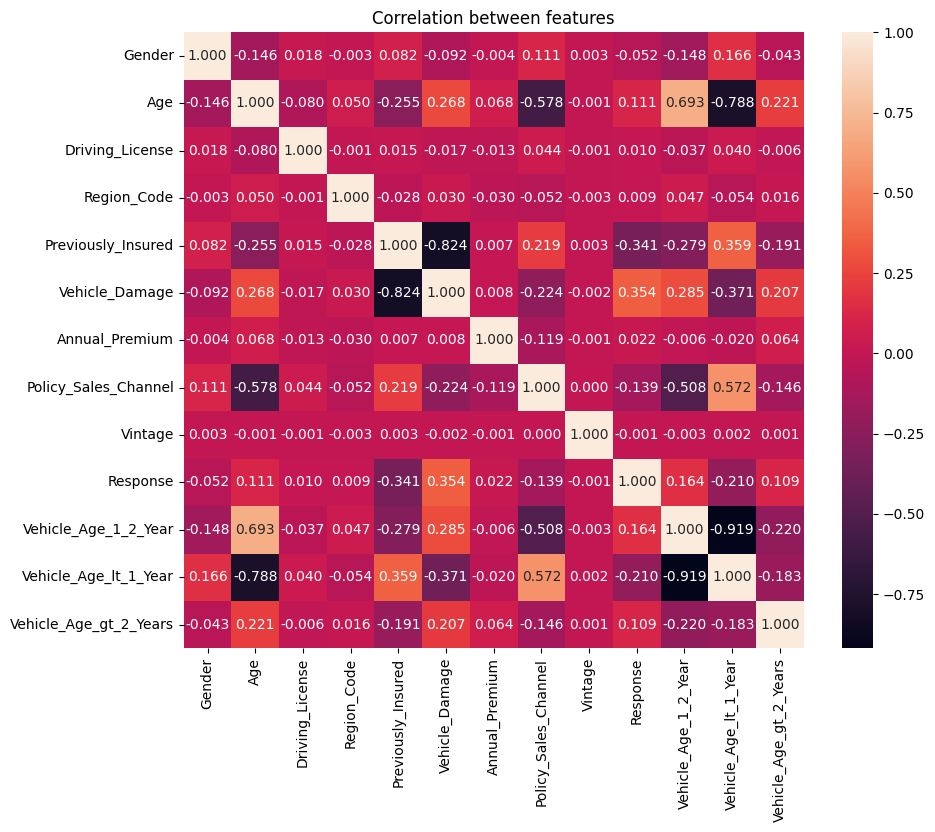

In [ ]:
plt.figure(figsize = [10, 8])
sns.heatmap(df_insurance.corr(), annot = True, fmt = '.3f');
plt.title('Correlation between features')

### **Summary:**
- Target Variable **"Response"** have **Imbalanced data**. **88%** of the **customers** are **Not Interested** to go for Vehicle Insurance, whereas **12%** of the customers are **Interested**.
   
- **Age**: While **fewer** people are in the **40–50 age** range, a **higher proportion** of them are **shown Interest** in the product.

- **Previously Insured**: People **not previously insured** (0) show a **much Interested** compared to those who are already insured.

- **Vehicle Damage** : **Customers** with **damaged vehicles** (1) are much **more Interested in Insurance** than those with undamaged vehicles.

- **Annual Premium**: **Strong right-skew** in the data. High premiums may genuinely reflect high-risk customers. Removing them might erase important business insights.

- **Region_Code** and **Policy_Sales_Channel** show **strong skew** — few categories dominate. **Both features** are **potentially** useful predictors of **response**.

### **Get the X & Y variable:**

In [12]:
X = df_insurance.drop('Response',axis = 1)
y = df_insurance['Response']

In [13]:
X.shape

(381109, 12)

In [14]:
y.shape

(381109,)

---
<a name = Section8></a>
# **9. Model Development and Evaluation**
---

- Before standardizing our data, let's spit them into training and testing sets.

<a name = Section91></a>
#### **9.1 Splitting the Data**

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)

print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (304887, 12) (304887,)
Testing Data Shape: (76222, 12) (76222,)


In [16]:
pd.Series(y_train).value_counts()

,count
Response,
0,267519
1,37368


<a name = Section92></a>
#### **9.2 Balance the minority class by SMOTE**

In [19]:
# smote = SMOTEENN(random_state=42)

smote = SMOTE(sampling_strategy=1, random_state=42,k_neighbors=5)   # Default k_neighbors=5
#-----
# from imblearn.over_sampling import BorderlineSMOTE
# smote = BorderlineSMOTE(random_state = 42, kind = 'borderline-2')
#-----
# from imblearn.over_sampling import ADASYN
# smote = ADASYN(sampling_strategy="minority")

# smote = SMOTETomek(random_state=42)

#sampling_strategy : oversample the minority class so that it will be 80% the size of the majority class.
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(X_train_smote.shape)
print(y_train_smote.shape)

(304887, 12)
(76222, 12)
(535038, 12)
(535038,)


In [21]:
pd.Series(y_train_smote).value_counts()

,count
Response,
0,267519
1,267519


##### Note : After applying SMOTE, minority class is up sampled and data is balanced now.

<a name = Section511></a>
#### **9.3 Feature Standardization**

In [22]:
# Standardizing training set and testing set
scale = StandardScaler()
X_train_smote = scale.fit_transform(X_train_smote)
X_train_normal_scaled = scale.transform(X_train)
X_test_normal_scaled = scale.transform(X_test)

print('Feature Standardization Success!')

Feature Standardization Success!


<a name=Section73 id=Section94></a>
### **9.4 Logistic Regression**

In [71]:
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train_smote, y_train_smote)

LogisticRegression(class_weight='balanced')

<a name = Section941></a>

## **9.4.1 Evaluating the model**

In [72]:
y_pred_train = logreg.predict(X_train_normal_scaled)
y_pred_test = logreg.predict(X_test_normal_scaled)

In [73]:
def evaluate():
  accuracy= accuracy_score(y_test, y_pred_test)
  lr_report_train = classification_report(y_train, y_pred_train)
  lr_report_test = classification_report(y_test, y_pred_test)

  print ('Accuracy =', accuracy*100,'%')
  print('                    Training Report          ')
  print(lr_report_train)
  print('                    Testing Report           ')
  print(lr_report_test)


In [74]:
evaluate()

Accuracy = 75.60809215187217 %
                    Training Report          
              precision    recall  f1-score   support

           0       0.95      0.76      0.84    267519
           1       0.29      0.71      0.41     37368

    accuracy                           0.75    304887
   macro avg       0.62      0.73      0.63    304887
weighted avg       0.87      0.75      0.79    304887

                    Testing Report           
              precision    recall  f1-score   support

           0       0.95      0.76      0.85     66880
           1       0.30      0.71      0.42      9342

    accuracy                           0.76     76222
   macro avg       0.62      0.74      0.63     76222
weighted avg       0.87      0.76      0.79     76222



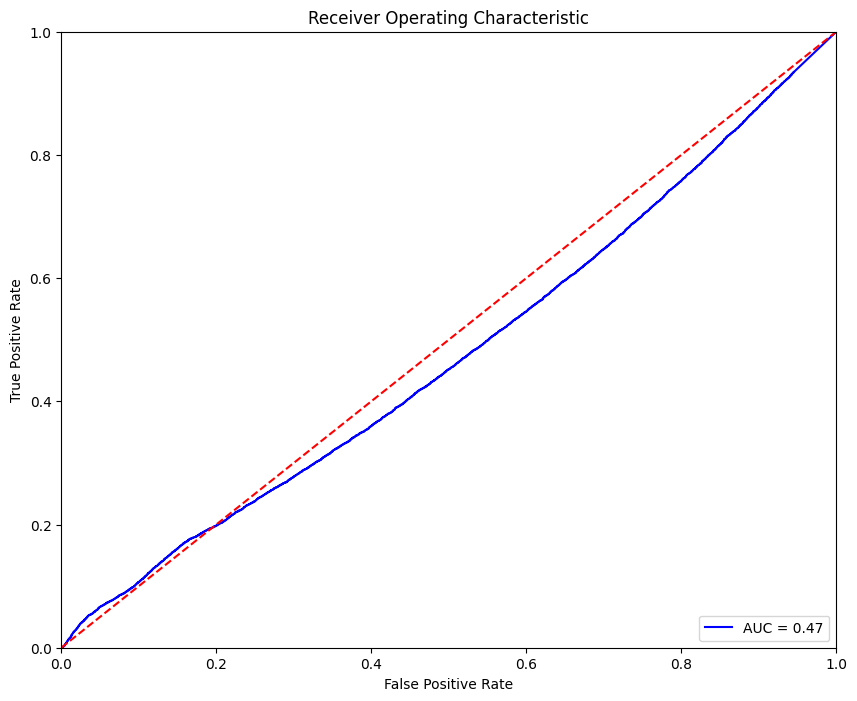

In [78]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logreg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)


import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<a name=Section95 id=Section73></a>
### **9.5 K Nearest Neighbour**

In [79]:
# Instantiating the classifier
knn= KNeighborsClassifier()

In [80]:
knn = KNeighborsClassifier()
knn.fit(X_train_smote, y_train_smote)

KNeighborsClassifier()

In [81]:
# Model Evaluation
y_pred_train = knn.predict(X_train_normal_scaled)
y_pred_test = knn.predict(X_test_normal_scaled)

In [82]:
evaluate()

Accuracy = 77.91713678465536 %
                    Training Report          
              precision    recall  f1-score   support

           0       0.97      0.86      0.91    267519
           1       0.44      0.78      0.56     37368

    accuracy                           0.85    304887
   macro avg       0.70      0.82      0.74    304887
weighted avg       0.90      0.85      0.87    304887

                    Testing Report           
              precision    recall  f1-score   support

           0       0.93      0.81      0.87     66880
           1       0.29      0.56      0.38      9342

    accuracy                           0.78     76222
   macro avg       0.61      0.68      0.62     76222
weighted avg       0.85      0.78      0.81     76222



<a name = Section96></a>
### **9.6 Random Forest with Hyperparameter Tuning**

In [89]:
param_grid = {
            'n_estimators': [50, 100, 200],   # Number of trees in the forest
            'max_depth': [None, 5, 10, 15, 20, 25],   # Maximum depth of the trees
            'max_features': ['sqrt']
                }

In [90]:
rf_hyper = RandomForestClassifier(random_state = 42)

In [91]:
rf_grid_cv = GridSearchCV(estimator=rf_hyper, param_grid=param_grid, cv=5,verbose=10)

In [92]:
rf_grid_cv.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5; 1/18] START max_depth=None, max_features=sqrt, n_estimators=50.........
[CV 1/5; 1/18] END max_depth=None, max_features=sqrt, n_estimators=50;, score=0.734 total time=  47.0s
[CV 2/5; 1/18] START max_depth=None, max_features=sqrt, n_estimators=50.........
[CV 2/5; 1/18] END max_depth=None, max_features=sqrt, n_estimators=50;, score=0.917 total time=  44.5s
[CV 3/5; 1/18] START max_depth=None, max_features=sqrt, n_estimators=50.........
[CV 3/5; 1/18] END max_depth=None, max_features=sqrt, n_estimators=50;, score=0.916 total time=  44.1s
[CV 4/5; 1/18] START max_depth=None, max_features=sqrt, n_estimators=50.........
[CV 4/5; 1/18] END max_depth=None, max_features=sqrt, n_estimators=50;, score=0.916 total time=  44.5s
[CV 5/5; 1/18] START max_depth=None, max_features=sqrt, n_estimators=50.........
[CV 5/5; 1/18] END max_depth=None, max_features=sqrt, n_estimators=50;, score=0.917 total time=  44.7s
[CV 1/5; 2/18] STAR

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 15, 20, 25],
                         'max_features': ['sqrt'],
                         'n_estimators': [50, 100, 200]},
             verbose=10)

In [93]:
best_rf_params = rf_grid_cv.best_params_
best_rf_model = rf_grid_cv.best_estimator_

In [94]:
best_rf_params

{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}

In [95]:
y_pred_train = best_rf_model.predict(X_train_normal_scaled)
y_pred_test = best_rf_model.predict(X_test_normal_scaled)

In [96]:
evaluate()

Accuracy = 82.37254336018472 %
                    Training Report          
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    267519
           1       1.00      1.00      1.00     37368

    accuracy                           1.00    304887
   macro avg       1.00      1.00      1.00    304887
weighted avg       1.00      1.00      1.00    304887

                    Testing Report           
              precision    recall  f1-score   support

           0       0.91      0.88      0.90     66880
           1       0.32      0.40      0.36      9342

    accuracy                           0.82     76222
   macro avg       0.62      0.64      0.63     76222
weighted avg       0.84      0.82      0.83     76222



### **Feature Importance**

In [97]:
# Feature Importance
importance_array = best_rf_model.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance_array
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                   Feature  Importance
4       Previously_Insured    0.161684
5           Vehicle_Damage    0.133392
8                  Vintage    0.127246
6           Annual_Premium    0.118273
1                      Age    0.108399
3              Region_Code    0.104053
7     Policy_Sales_Channel    0.087022
10   Vehicle_Age_lt_1_Year    0.076843
0                   Gender    0.033859
9     Vehicle_Age_1_2_Year    0.030986
11  Vehicle_Age_gt_2_Years    0.017889
2          Driving_License    0.000354


**Observation:**

1.   These **six features Previously_Insured, Vehicle_Damage, Vintage, Annual_Premium, Age, Region_Code** are **contributing ~75%+ of the total model's decision-making**.
2.   **Driving_License, Vehicle_Age_gt_2_Years, Vehicle_Age_1_2_Year, Gender** are the **low impacted** Features.

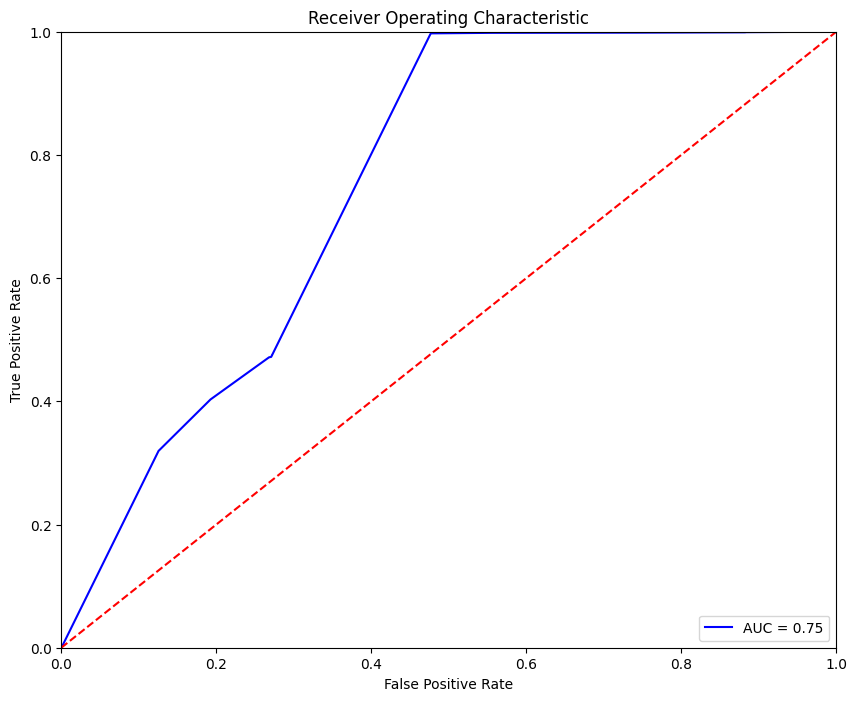

In [98]:
# calculate the fpr and tpr for all thresholds of the classification
probs = best_rf_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)


import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<a name = Section97></a>
### **9.7 XGBoost Parameter Search with RandomizedSearchCV**

In [103]:
# xgboost Parameter Search with RandomizedSearchCV

# 1. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Calculate class imbalance ratio for scale_pos_weight
neg, pos = np.bincount(y_train)
scale_pos_weight = neg / pos
print("scale_pos_weight:", scale_pos_weight)

# 3. Set up XGBoost classifier
xgb_clf = xgb.XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

# 4. Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 6, 10, 15, 20],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2]
}

# 5. Set up RandomizedSearchCV with 3-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=10,  # Number of random searches to perform
    scoring='f1_macro',  # Choose f1_macro to balance recall/precision
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# 6. Fit the model with RandomizedSearchCV
random_search.fit(X_train_scaled, y_train)

# 7. Display the best hyperparameters
print("\nBest Parameters from RandomizedSearchCV:", random_search.best_params_)

# 8. Use the best estimator
best_xgb_model = random_search.best_estimator_

# 9. Predict on training and test data
y_pred_train = best_xgb_model.predict(X_train_scaled)
y_pred_test = best_xgb_model.predict(X_test_scaled)

# 10. Evaluate the model on training data
print("\nTraining Accuracy:", accuracy_score(y_train, y_pred_train) * 100, "%")
print("Training Report:\n", classification_report(y_train, y_pred_train))

# 11. Evaluate the model on test data
print("\nTesting Accuracy:", accuracy_score(y_test, y_pred_test) * 100, "%")
print("Testing Report:\n", classification_report(y_test, y_pred_test))

scale_pos_weight: 7.159039820166988
Fitting 3 folds for each of 10 candidates, totalling 30 fits

Best Parameters from RandomizedSearchCV: {'subsample': 0.6, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 15, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 0.8}

Training Accuracy: 86.01645855677677 %
Training Report:
               precision    recall  f1-score   support

           0       1.00      0.84      0.91    267519
           1       0.47      1.00      0.64     37368

    accuracy                           0.86    304887
   macro avg       0.73      0.92      0.78    304887
weighted avg       0.93      0.86      0.88    304887


Testing Accuracy: 78.06538794573746 %
Testing Report:
               precision    recall  f1-score   support

           0       0.95      0.79      0.86     66880
           1       0.32      0.71      0.44      9342

    accuracy                           0.78     76222
   macro avg       0.64      0.75      0.65     76222
weight

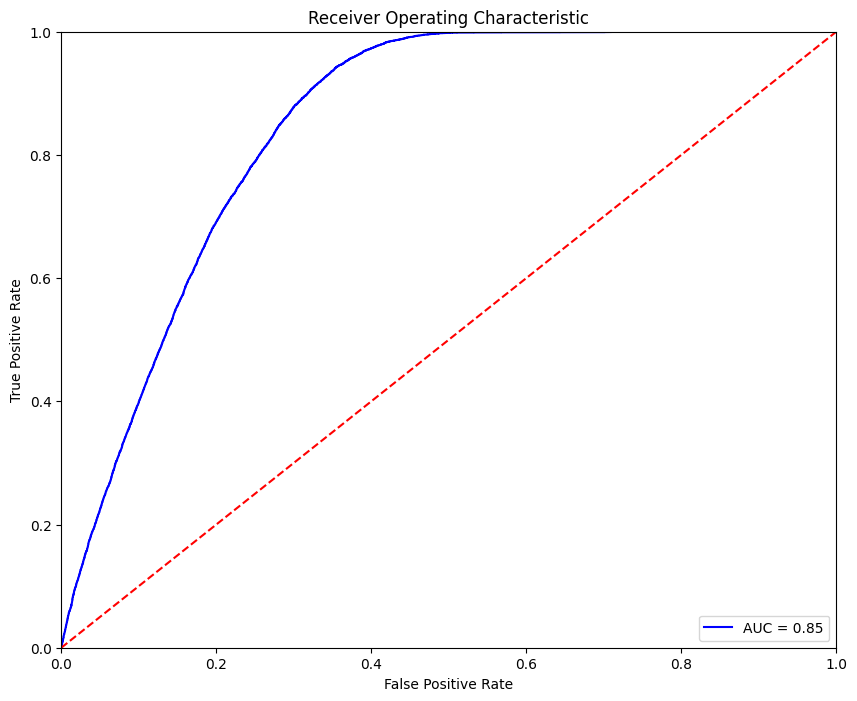

In [104]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = best_xgb_model.predict_proba(X_test_scaled)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)


import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<a name = Section98></a>
### **9.8 Finalize the Model**

**Observation :**

|Metric|Random Forest|XG Boost|
| :-- | :-- | :-- |
|Accuracy|**82.37%**|78.06% |
|Precision (Class 1)|0.32|0.32|
|Recall (Class 1)|0.40|**0.71** |
|F1-score (Class 1)|0.36|**0.44** |
|Precision (Class 0)|**0.91**|**0.95** |
|Recall (Class 0)|**0.88**|0.79|
|F1-score (Class 0)|**0.90**|0.86
|AUC               |0.75 | **0.85**|

**Random Forest**
- Performs better in overall accuracy.
- Strong at classifying the majority class (0).
- Weaker recall for minority class (1), which may be critical depending on business priority.

**XGBoost**
- Higher recall for class 1 (71%) — this means it identifies more people who are actually interested in the insurance offer.
- Slightly overfits (training accuracy 86%, test 78%) but gives better attention to the under represented class.

**Recommendation:**
Considering the business goal is to **maximize conversions** (i.e., catch as **many interested customers as possible), and max AUC**, we will select **XGBoost** due to its **higher recall on class 1**.

<a name = Section99></a>
### **9.9 Save & Evaluate the Model**

In [122]:
import joblib

# Save the best model from RandomizedSearchCV
joblib.dump(best_xgb_model, 'best_xgb_model.pkl')

# Save the StandardScaler (used to scale training data)
joblib.dump(scaler, 'standard_scaler.pkl')

print("Model and scaler saved successfully.")

Model and scaler saved successfully.


In [105]:
data = {"Gender": [1], "Age":[56], "Driving_License":[1], "Region_Code":[28], "Previously_Insured":[0], "Vehicle_Damage":[1],
                                "Annual_Premium":[32031], "Policy_Sales_Channel":[26], "Vintage":[72], "Vehicle_Age_1_2_Year":[1],
                                "Vehicle_Age_lt_1_Year":[0], "Vehicle_Age_gt_2_Years":[0]}

X_new = pd.DataFrame(data)

In [106]:
X_new

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_1_2_Year,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years
0,1,56,1,28,0,1,32031,26,72,1,0,0


In [121]:
import pandas as pd
import numpy as np

# Load new customer data
# X_new = pd.read_csv("new_customers.csv")  # Uncomment and replace if needed

# Preprocess: scale features like in training
X_new_scaled = scaler.transform(X_new)

# Predict probabilities for class 1
probs = best_xgb_model.predict_proba(X_new_scaled)[:, 1]

# Apply threshold
threshold = 0.50
preds = (probs >= threshold).astype(int)

# Create DataFrame with predictions
df_results = pd.DataFrame({"probability": probs, "prediction": preds})

df_results

,probability,prediction
0,0.713453,1


---
<a name = Section10></a>
# **10. Actionable Insights**
---

**Target Uninsured Customers Aggressively:** Customers who are **NOT previously insured** show a **much higher response rate**.

**Actions**:

1.   **Focus marketing campaigns** on **individuals** who **don’t** currently **have insurance**.
2.   Use **partnerships** or **third-party** data to **identify uninsured vehicle owners**

---

**Leverage Vehicle Damage History in Campaigns:** **Customers** with **prior vehicle damage** are significantly **more likely to respond**.

---

**Avoid Wasting Resources on Already Insured Customers:** **Customers** who **already** have **insurance almost never respond**.

**Actions:**
1.  **Exclude or de-prioritize previously insured users from high-budget ad campaigns**.
2.  **Instead** of pitching **new insurance**, **consider offering**: **Add-on products (e.g., enhanced coverage, theft protection)**

---

**Capitalize on the 40–50 Age Group’s High Intent**:

**Actions:**
1.  Run **age-segmented Facebook/Google Ads** specifically for **ages 40–50**.
2.  Use **personalized follow-ups (SMS/email)** for leads in the **40–50 age band**.
3.  Tailor Product Offerings for Life Stage Needs. People in their 40s often: Own higher-value assets, Have family responsibilities.
**Bundle offerings** like:
“**Family protection package**”,
**“Long-term savings plan with vehicle insurance”.**